<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-coloring-book/blob/master/main_coloring_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Interactiv Coloring Book**


![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/coloring_book_picture.png)

**Group Members**
* Johannes Scheibe
* Thilo von Glan 
* Jill Baumann

## Main goal
"Create a coloring template out of a photo"

**Subtasks**

Make and/or select images and load these images
* Handle color space (from BGR to RGB or CIELAB)
  
Segmentate the image into sensible parts/regions/segments
* Different methods possible
  * manually choose each region
  * define the number of regions manually
  * recognize regions automatically, based on color differences 
    * opportunity to change parameters
* Algorithms
  * Preprocessing
    * apply different filters to support the edge detection
      * monochrome picture
      * smooth the image (Gaussian filter)
      * contrast adjustment 
  * Edge detection
    * brightness variation between bordering pixels -> Edge
  * Image segmentation
    * region growing
    * based on colors ((SLIC)Superpixels)

Make the boarder of each segment clearly visible (without colours)

Provide these colors
* Color detection
  * define a set of colors
  * assign colors from the predefined set to the regions based on their (average) color
  * replace colors with appropiate, predefined numbers

User interface 
* upload the picture
* download the result
* adjust settings to get different results




**Scenarios**
* blurred images
* high detailled images
* existing images from coloring books
* faces

# Project Planing

![alt text](https://github.com/uol-mediaprocessing/group-projects-coloring-book/blob/master/Planung.PNG?raw=1)

**Pictures**

In [0]:
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-FC_Valencia.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1090381.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1090785.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100188.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100817.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1110307.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1110648.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1120140.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1120481.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1120827.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1120922.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1130307.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Racing-Car.jpg
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/church.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/landscape.jpg
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg 
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/london.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/night_lights.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/gherkin.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/snow.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/squirrel.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/sunset.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/sunset2.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/damian-lewis.jpeg

In [0]:
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread("Badge-Liverpool.png")
img2 = cv2.imread("Badge-FC_Valencia.png")
img3 = cv2.imread("Board-Game.jpeg")
img4 = cv2.imread("P1090381.JPG")
img5 = cv2.imread("P1090785.JPG")
img6 = cv2.imread("P1100010.JPG")
img7 = cv2.imread("P1100188.JPG")
img8 = cv2.imread("P1100817.JPG")
img9 = cv2.imread("P1100817.JPG")
img10 = cv2.imread("P1110648.JPG")
img11 = cv2.imread("P1120140.JPG")
img12 = cv2.imread("P1120481.JPG")
img13 = cv2.imread("P1120827.JPG")
img14 = cv2.imread("P1120922.JPG")
img15 = cv2.imread("P1130307.JPG")
img16 = cv2.imread("Racing-Car.jpg")
img17 = cv2.imread("church.JPG")
img18 = cv2.imread("landscape.jpg")
img19 = cv2.imread("preikestolen.jpg")
img20 = cv2.imread("london.JPG")
img21 = cv2.imread("night_lights.JPG")
img22 = cv2.imread("gherkin.JPG")
img23 = cv2.imread("snow.JPG")
img24 = cv2.imread("squirrel.JPG")
img25 = cv2.imread("sunset.JPG")
img26 = cv2.imread("sunset2.JPG")
img27 = cv2.imread("damian-lewis.jpeg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
img13 = cv2.cvtColor(img13, cv2.COLOR_BGR2RGB)
img14 = cv2.cvtColor(img14, cv2.COLOR_BGR2RGB)
img15 = cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)
img16 = cv2.cvtColor(img16, cv2.COLOR_BGR2RGB)
img17 = cv2.cvtColor(img17, cv2.COLOR_BGR2RGB)
img18 = cv2.cvtColor(img18, cv2.COLOR_BGR2RGB)
img19 = cv2.cvtColor(img19, cv2.COLOR_BGR2RGB)
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
img21 = cv2.cvtColor(img21, cv2.COLOR_BGR2RGB)
img22 = cv2.cvtColor(img22, cv2.COLOR_BGR2RGB)
img23 = cv2.cvtColor(img23, cv2.COLOR_BGR2RGB)
img24 = cv2.cvtColor(img24, cv2.COLOR_BGR2RGB)
img25 = cv2.cvtColor(img25, cv2.COLOR_BGR2RGB)
img26 = cv2.cvtColor(img26, cv2.COLOR_BGR2RGB)
img27 = cv2.cvtColor(img27, cv2.COLOR_BGR2RGB)



<function matplotlib.pyplot.show>

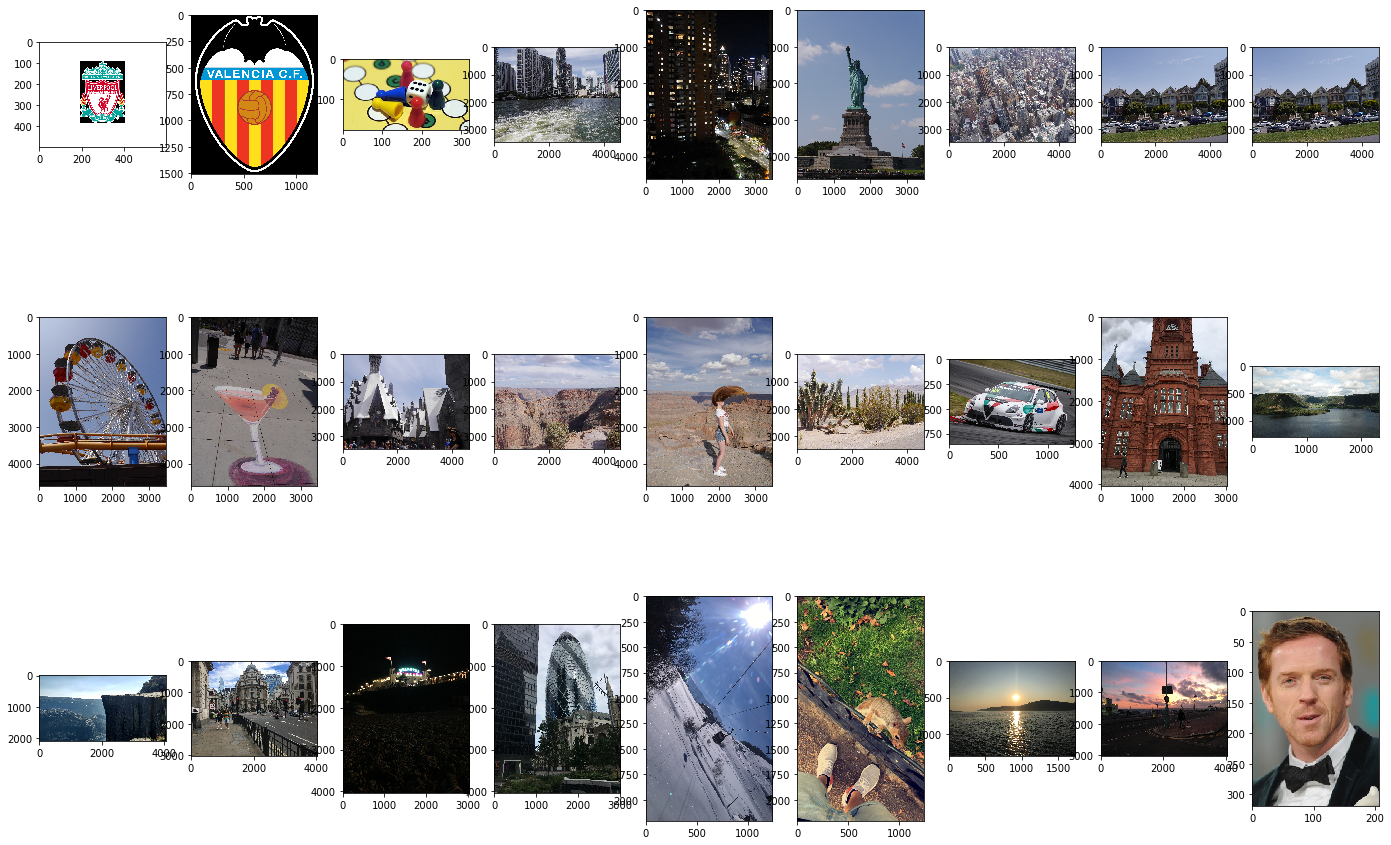

In [14]:
fig, axs = plt.subplots(3,9)
axs[0,0].imshow(img1)
axs[0,1].imshow(img2)
axs[0,2].imshow(img3)
axs[0,3].imshow(img4)
axs[0,4].imshow(img5)
axs[0,5].imshow(img6)
axs[0,6].imshow(img7)
axs[0,7].imshow(img8)
axs[0,8].imshow(img9)
axs[1,0].imshow(img10)
axs[1,1].imshow(img11)
axs[1,2].imshow(img12)
axs[1,3].imshow(img13)
axs[1,4].imshow(img14)
axs[1,5].imshow(img15)
axs[1,6].imshow(img16)
axs[1,7].imshow(img17)
axs[1,8].imshow(img18)
axs[2,0].imshow(img19)
axs[2,1].imshow(img20)
axs[2,2].imshow(img21)
axs[2,3].imshow(img22)
axs[2,4].imshow(img23)
axs[2,5].imshow(img24)
axs[2,6].imshow(img25)
axs[2,7].imshow(img26)
axs[2,8].imshow(img27)


fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.show

**Monochrome filter**

--2019-10-30 12:05:54--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354462 (1.3M) [image/jpeg]
Saving to: ‘preikestolen.jpg.14’

preikestolen.jpg.14 100%[===================>]   1.29M  --.-KB/s    in 0.02s   

2019-10-30 12:05:54 (52.0 MB/s) - ‘preikestolen.jpg.14’ saved [1354462/1354462]



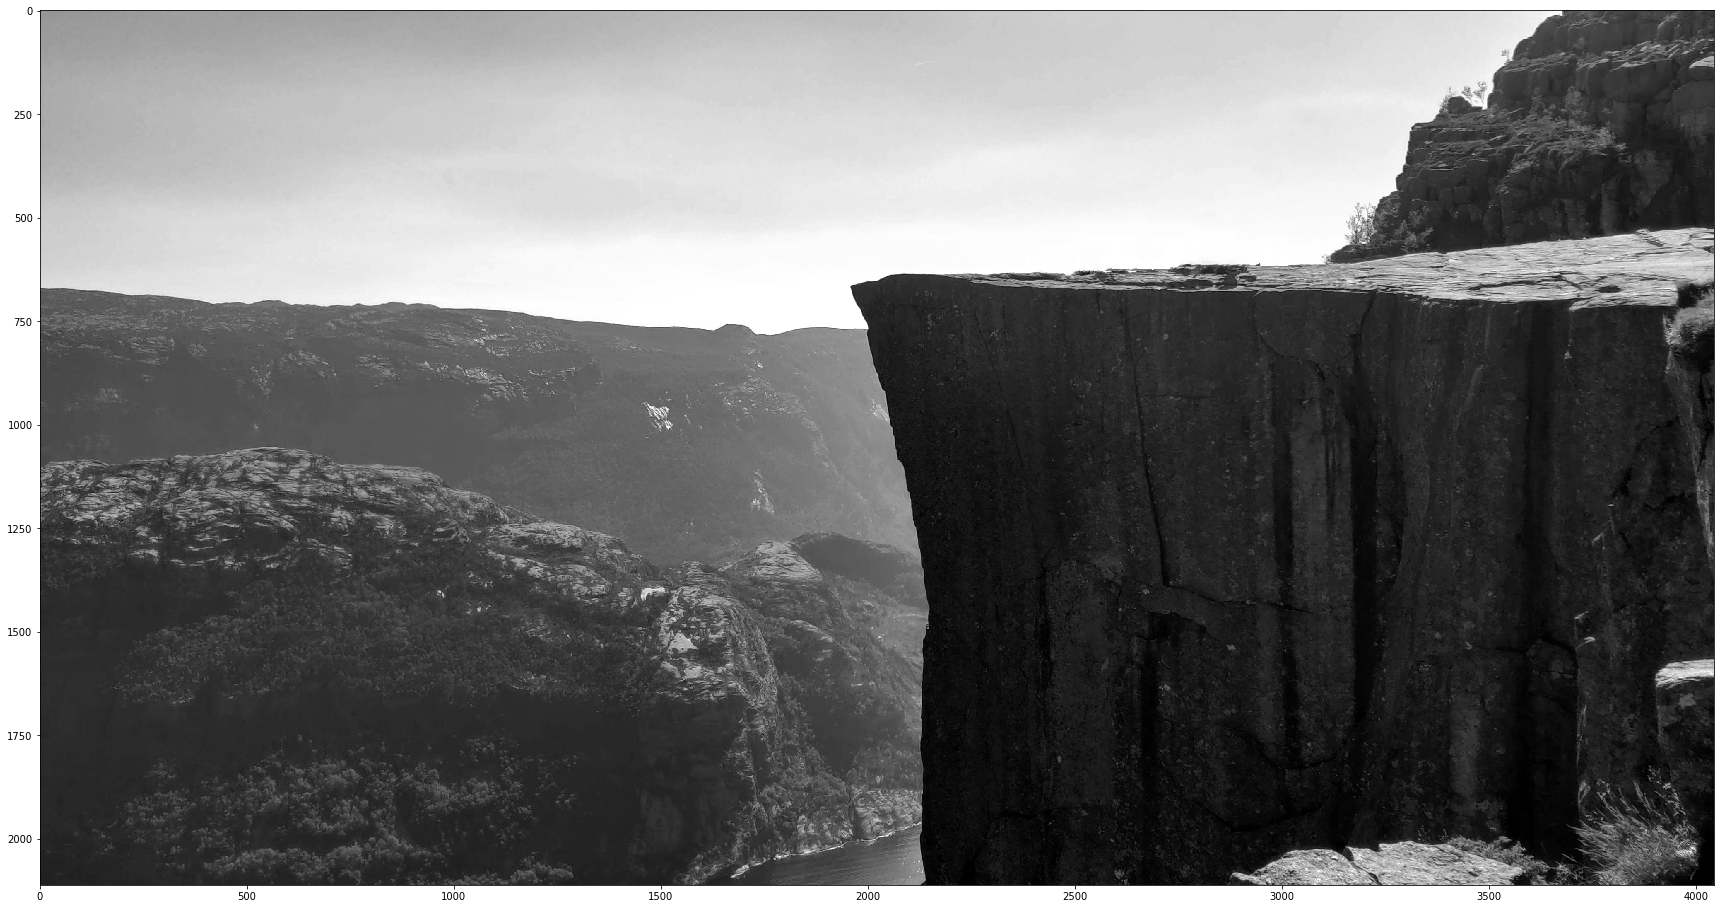

In [28]:
import matplotlib.pyplot as plt
import cv2

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg 
preikestolen = cv2.imread("preikestolen.jpg")
preikestolen = cv2.cvtColor(preikestolen, cv2.COLOR_BGR2GRAY)

plt.imshow(preikestolen, cmap='gray', vmin=0, vmax=255)

**Gaussian Blur**

--2019-10-30 12:15:46--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354462 (1.3M) [image/jpeg]
Saving to: ‘preikestolen.jpg.18’

preikestolen.jpg.18 100%[===================>]   1.29M  --.-KB/s    in 0.02s   

2019-10-30 12:15:46 (55.0 MB/s) - ‘preikestolen.jpg.18’ saved [1354462/1354462]



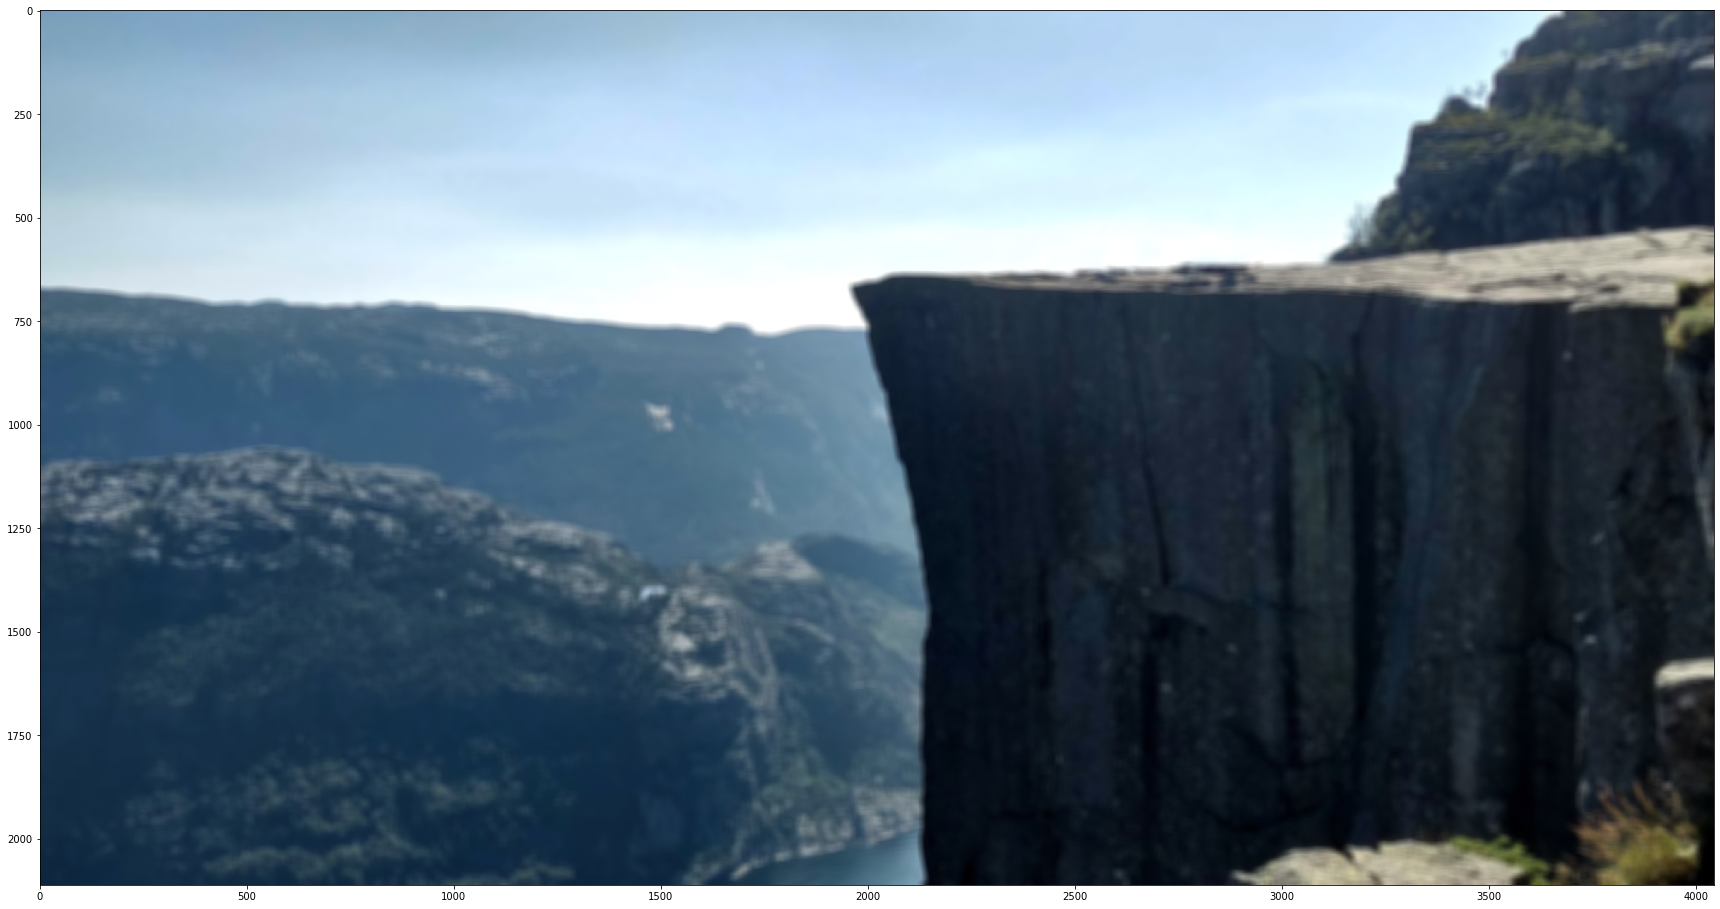

In [32]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg 
preikestolen = cv2.imread("preikestolen.jpg")
preikestolen = cv2.cvtColor(preikestolen, cv2.COLOR_BGR2RGB)

blur = cv2.blur(preikestolen,(20,20))

plt.imshow(blur)